### 4-5 folders were extracted and images were separated by their categories, example all detergent images in one folder, all milk products in another folder, all Chips images in one folder and all cosmetic product images in one folder.

In [1]:
## The following is an approach for the given object classification assignment, Please dont mind the accuracy as this is just 
## an approach to the given problem as less data was used, the model will probably over fit for sure.

In [2]:
## importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
print (os.listdir())

['.ipynb_checkpoints', 'Augmentations', 'Classifier Notebook.ipynb', 'good ones', 'Image Augmentation Code.ipynb', 'Testing Images', 'Train', 'unbalanced data', 'Validation']


In [4]:
data = []
labels = []
classes = 6
#Every class has 200 images,totally there are 1200 images used for 6 classes,some of the images were Augmented to balance dataset

In [5]:
for i in range(classes):
    path = os.path.join(r'D:\DATA SCIENCE\DataSets\Research\Parallel Dots','Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a).convert('RGB')
            image = image.resize((100,100))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)
# Loading all images and pre processing them         

In [6]:
#data = np.array(data)
labels = np.array(labels)

In [7]:
data

[array([[[130, 118, 104],
         [100,  83,  65],
         [ 69,  51,  40],
         ...,
         [150,  96, 122],
         [140,  87, 110],
         [138,  91, 111]],
 
        [[145, 135, 129],
         [110,  97,  77],
         [ 71,  52,  33],
         ...,
         [158, 127, 141],
         [163, 139, 156],
         [164, 145, 161]],
 
        [[149, 144, 132],
         [ 90,  85,  68],
         [ 63,  42,  23],
         ...,
         [159, 135, 145],
         [181, 176, 179],
         [191, 187, 192]],
 
        ...,
 
        [[ 73,  65,  49],
         [ 78,  68,  51],
         [ 80,  71,  56],
         ...,
         [  8,   8,  17],
         [ 17,  14,  21],
         [ 21,  18,  26]],
 
        [[ 71,  62,  45],
         [ 77,  67,  50],
         [ 79,  71,  53],
         ...,
         [ 16,  14,  31],
         [ 31,  24,  34],
         [ 33,  26,  38]],
 
        [[ 76,  68,  49],
         [ 80,  68,  54],
         [ 84,  76,  57],
         ...,
         [ 26,  20,  52],
  

In [8]:
labels

array([0, 0, 0, ..., 5, 5, 5])

In [9]:
os.mkdir('model')

np.save('./model/data',data)
np.save('./model/target',labels)
# Saving the model

In [10]:
data=np.load('./model/data.npy')
labels=np.load('./model/target.npy')
# Loading the model

In [11]:
data = data / data.max()
# Normalizing the data(images) to avoid over fitting 

In [12]:
print(data.shape, labels.shape)
# shapes of data and their classes

(1223, 100, 100, 3) (1223,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
# splitting the data and labels

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(978, 100, 100, 3) (245, 100, 100, 3) (978,) (245,)


## Convert labels to onehot encoding

In [15]:
y_train = to_categorical(y_train, 6)
y_test = to_categorical(y_test, 6)
# 6 here indicates 6 classes

In [16]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.80))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.80))
model.add(Dense(6, activation='softmax'))
# creating a convolutional neural network
# note:- drop out is used to avoid over fitting problem

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
monitor = EarlyStopping(monitor="val_loss", min_delta= 1e-3, patience = 6, verbose=1, restore_best_weights=True)
## Early stopping was again used to try avoiding over fitting 

In [19]:
epochs = 100
history = model.fit(X_train, y_train, batch_size=15, epochs=epochs, validation_data=(X_test, y_test), callbacks=[monitor])

Epoch 1/100
66/66 [==============================] - 62s 931ms/step - loss: 5.3013 - accuracy: 0.1697 - val_loss: 1.7641 - val_accuracy: 0.2163
Epoch 2/100
66/66 [==============================] - 60s 915ms/step - loss: 1.7365 - accuracy: 0.2602 - val_loss: 1.6031 - val_accuracy: 0.4163
Epoch 3/100
66/66 [==============================] - 55s 837ms/step - loss: 1.4982 - accuracy: 0.4175 - val_loss: 1.4060 - val_accuracy: 0.4286
Epoch 4/100
66/66 [==============================] - 56s 851ms/step - loss: 1.2732 - accuracy: 0.5321 - val_loss: 1.2630 - val_accuracy: 0.4980
Epoch 5/100
66/66 [==============================] - 52s 796ms/step - loss: 1.0951 - accuracy: 0.5894 - val_loss: 1.2444 - val_accuracy: 0.4898
Epoch 6/100
66/66 [==============================] - 52s 795ms/step - loss: 0.9058 - accuracy: 0.6595 - val_loss: 1.2636 - val_accuracy: 0.5102
Epoch 7/100
66/66 [==============================] - 52s 793ms/step - loss: 0.7532 - accuracy: 0.7324 - val_loss: 1.1998 - val_accuracy:

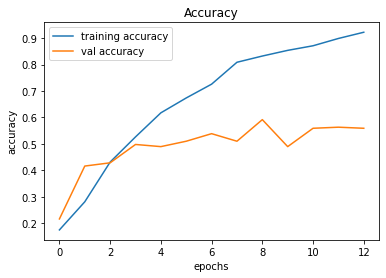

In [20]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

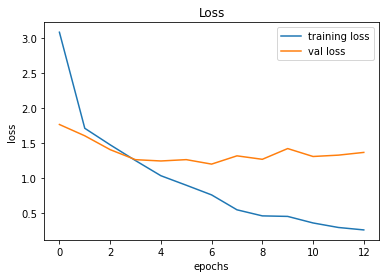

In [21]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## LEt's do testing on Test data

## Save the model

In [22]:
model.save("./model/model.h5")

## Load the Model

In [23]:
from keras.models import load_model
model = load_model('./model/model.h5')
# loading the saved model

In [24]:
classes = { 0:'Chocolates',
            1:'Detergents',
            2:'Cosmetics',
            3:'Beverages',
            4:'Chips',
            5:'Spreads'}

In [25]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img).convert('RGB')
    image = image.resize((100,100))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

C:\Users\Rahul\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predicted Image is:  Beverages


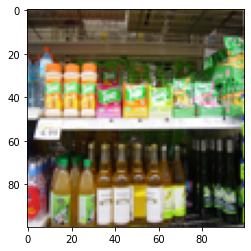

In [26]:
plot,prediction = test_on_img(r'D:\DATA SCIENCE\DataSets\Research\Parallel Dots\Testing Images\beverages\db604.jpg')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted Image is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted Image is:  Cosmetics


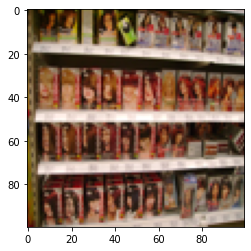

In [33]:
plot,prediction = test_on_img(r'D:\DATA SCIENCE\DataSets\Research\Parallel Dots\Testing Images\cosmetics\db2660.jpg')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted Image is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted Image is:  Detergents


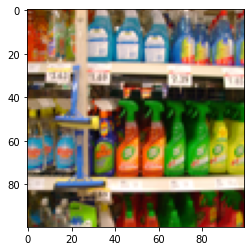

In [28]:
plot,prediction = test_on_img(r'D:\DATA SCIENCE\DataSets\Research\Parallel Dots\Testing Images\detergents\db2181.jpg')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted Image is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted Image is:  Chips


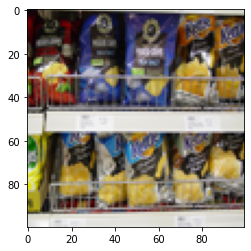

In [36]:
plot,prediction = test_on_img(r'D:\DATA SCIENCE\DataSets\Research\Parallel Dots\Testing Images\Chips\db426.jpg')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted Image is: ", classes[a])
plt.imshow(plot)
plt.show()

Predicted Image is:  Chocolates


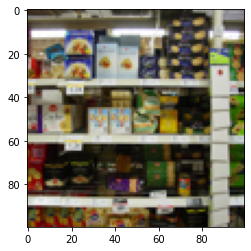

In [41]:
plot,prediction = test_on_img(r'D:\DATA SCIENCE\DataSets\Research\Parallel Dots\Testing Images\biscuits\db1199.jpg')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted Image is: ", classes[a])
plt.imshow(plot)
plt.show()

### The model is overfitting and hence drop out was added to tackle the problem,
###  Additionally the complexity of the model was reduced by removing some layers and simplifying the model,
###  Early stopping was used to avoid random guessing of the right epoch and avoiding overfitting again
### Still the number of images used for training the model was very low that is each class had 200 images, 
### Data Augmentation was used to have a balanced dataset.
### The model was previously trained by using only 100 images for each class and the accuracy was 23 percent,
### By adding more images to the training phase ie:- 200 images for each class the performance of the model improved to 55 percent hence showing us improvements when model is trained on additional data.